In [2]:
import chipwhisperer
import numpy as np
import matplotlib.pyplot as plt
import src.cfg.cfg as cfg

In [3]:
SCOPETYPE = 'CWNANO'
PLATFORM = 'CWNANO'

%run "/home/dakshina/projects/csaw_esc_2025/challenges/setup/Setup_Generic.ipynb"

(ChipWhisperer NAEUSB WARNING|File naeusb.py:826) Your firmware (0.65.0) is outdated - latest is 0.66.0 See https://chipwhisperer.readthedocs.io/en/latest/firmware.html for more information


INFO: Found ChipWhisperer😍


In [18]:
cw.program_target(scope, prog, "/home/dakshina/projects/powerfuzz/benchmarks/sample/sample-CWNANO.hex")

Detected known STMF32: STM32F04xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 4943 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 4943 bytes


In [38]:
scope.dis()
target.dis()

In [4]:
power_traces = []
inputs = []
for i in range(8):
    scope.arm()
    # data = inputs_data[i]
    data = np.random.randint(0, 256, size=4).tolist()
    target.simpleserial_write('a', bytes(data))

    ret = scope.capture()
    if ret:
        print('Timeout happened during acquisition')
        
    resp = target.simpleserial_read('r', 1)
    power_trace = scope.get_last_trace()
    inputs.append(data)
    power_traces.append(power_trace)

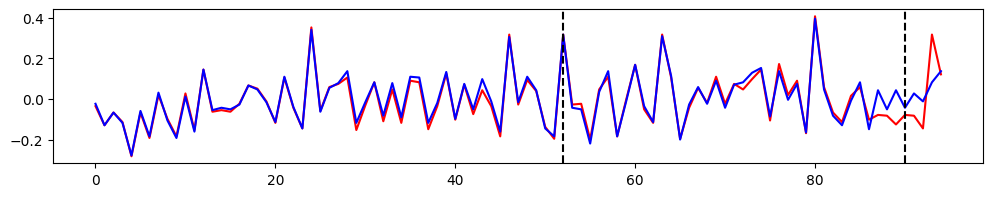

In [69]:
plt.figure(figsize=(12,2))
plt.plot(power_traces[0][5:100], color='red', label='Input 0')
plt.plot(power_traces[1][5:100], color='blue', label='Input 1')
# plt.plot(power_traces[2][5:100], color='green', label='Input 2')
# plt.plot(power_traces[3][:200], color='purple', label='Input 3')
# plt.plot(power_traces[4][:200], color='orange', label='Input 4')
# plt.plot(power_traces[5][:200], color='cyan', label='Input 5')
# plt.plot(power_traces[6][:200], color='blue', label='Input 6')
# plt.plot(power_traces[7][:200], color='yellow', label='Input 7')
plt.axvline(x=90, color='black', linestyle='--')
plt.axvline(x=52, color='black', linestyle='--')
plt.show()

In [70]:
import importlib
importlib.reload(cfg)

g = cfg.CFG()
for i in range(2):
    g.insert(power_traces[i][5:200], inputs[i])
g.display()

Node(shape=(91,), input=None)
  Node(shape=(104,), input=[32, 64, 244, 51])
  Node(shape=(104,), input=[18, 254, 39, 185])


91


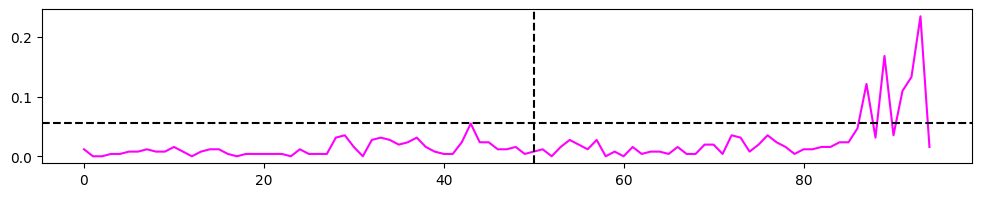

In [72]:
import importlib
importlib.reload(cfg)

diff = power_traces[0][5:100]- power_traces[1][5:100]
plt.figure(figsize=(12,2))
plt.plot(np.abs(diff), color='magenta', label='Difference Trace')
d = g.threshold
plt.axhline(y=d, color='black', linestyle='--', label='Threshold')
plt.axvline(x=50, color='black', linestyle='--')
print(g._find_divergence_point(power_traces[0][5:100], power_traces[1][5:100]))